<a href="https://colab.research.google.com/github/ovozzx/Machine-Learning/blob/master/%5BDacon%5Dwine_quality_classification(%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. ÏΩîÎìú Ìï¥ÏÑù  ‚òëÔ∏è

2. Ï†êÏàò ÎÜíÏù¥Í∏∞(ÏïôÏÉÅÎ∏î(Îã§Î•∏ Î™®Îç∏), Ï°∞Í±¥ Ï∂îÍ∞Ä(GridSearch)

3. ÏΩîÎìú Ïïà Î≥¥Í≥† ÏûëÏÑ±


https://heytech.tistory.com/149

# ÏïôÏÉÅÎ∏î Î™®Îç∏ = ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ + Îã§Î•∏ Î∂ÑÎ•òÍ∏∞

# 0. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî©

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns #Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ïù¥Ïö©
#SeabornÏùÄ MatplotlibÏùÑ Í∏∞Î∞òÏúºÎ°ú Îã§ÏñëÌïú ÏÉâÏÉÅ ÌÖåÎßàÏôÄ ÌÜµÍ≥ÑÏö© Ï∞®Ìä∏ Îì±Ïùò Í∏∞Îä•ÏùÑ Ï∂îÍ∞ÄÌïú ÏãúÍ∞ÅÌôî Ìå®ÌÇ§ÏßÄÏù¥Îã§. 
#Í∏∞Î≥∏Ï†ÅÏù∏ ÏãúÍ∞ÅÌôî Í∏∞Îä•ÏùÄ Matplotlib Ìå®ÌÇ§ÏßÄÏóê ÏùòÏ°¥ÌïòÎ©∞ ÌÜµÍ≥Ñ Í∏∞Îä•ÏùÄ Statsmodels Ìå®ÌÇ§ÏßÄÏóê ÏùòÏ°¥ÌïúÎã§.

#Í≤ΩÍ≥† Î©îÏãúÏßÄ Ïà®Í∏∞Í∏∞
import warnings
warnings.filterwarnings(action='ignore')

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 2. Í∞ÑÎã®Ìïú EDA

- index : Íµ¨Î∂ÑÏûê

- quality : ÌíàÏßà ‚Üí yÍ∞í

- fixed acidity : ÏÇ∞ÎèÑ

- volatile acidity : ÌúòÎ∞úÏÑ±ÏÇ∞

- citric acid : ÏãúÌä∏Î•¥ÏÇ∞

- residual sugar ÏûîÎãπ : Î∞úÌö® ÌõÑ ÏôÄÏù∏ ÏÜçÏóê ÎÇ®ÏïÑÏûàÎäî ÎãπÎ∂Ñ

- chlorides : ÏóºÌôîÎ¨º

- free sulfur dioxide : ÎèÖÎ¶Ω Ïù¥ÏÇ∞ÌôîÌô©

- total sulfur dioxide : Ï¥ù Ïù¥ÏÇ∞ÌôîÌô©

- density : Î∞ÄÎèÑ

- pH : ÏàòÏÜåÏù¥Ïò®ÎÜçÎèÑ

- sulphates : Ìô©ÏÇ∞Ïóº

- alcohol : ÎèÑÏàò

- type : Ï¢ÖÎ•ò



In [3]:
# train Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÌòïÏùÑ ÏÇ¥Ìé¥Î¥ÖÎãàÎã§.
# indexÎ•º Ï†úÏô∏ÌïòÎ©¥ Ï¥ù 13Í∞ú Î≥ÄÏàòÎ•º Í∞ÄÏßëÎãàÎã§.
train.head()

index  quality  fixed acidity  ...  sulphates  alcohol   type
0      0        5            5.6  ...       0.44     10.2  white
1      1        5            8.8  ...       0.59      9.5    red
2      2        5            7.9  ...       0.52     10.9  white
3      3        6            7.0  ...       0.50     10.8  white
4      4        6            7.8  ...       0.43     10.9  white

[5 rows x 14 columns]

In [4]:
# test Îç∞Ïù¥ÌÑ∞Ïùò Í∞úÌòïÏùÑ ÏÇ¥Ìé¥Î¥ÖÎãàÎã§.
# indexÎ•º Ï†úÏô∏ÌïòÎ©¥ Ï¥ù 12Í∞ú Î≥ÄÏàòÎ•º Í∞ÄÏßëÎãàÎã§.
# train Ï§ë quality Î≥ÄÏàòÍ∞Ä ÏÇ¨ÎùºÏ°åÏäµÎãàÎã§.
test.head()

index  fixed acidity  volatile acidity  ...  sulphates  alcohol   type
0      0            9.0              0.31  ...       0.38     11.6  white
1      1           13.3              0.43  ...       0.49      9.0    red
2      2            6.5              0.28  ...       0.69      9.4  white
3      3            7.2              0.15  ...       0.47     10.0  white
4      4            6.8              0.26  ...       0.47     11.8  white

[5 rows x 13 columns]

In [5]:
# train Îç∞Ïù¥ÌÑ∞Ïùò Ïó¥ Î≥Ñ Ï†ïÎ≥¥Î•º ÏÇ¥Ìé¥Î¥ÖÎãàÎã§. 
# Í≤∞Ï∏°ÏπòÎäî ÏóÜÏäµÎãàÎã§.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


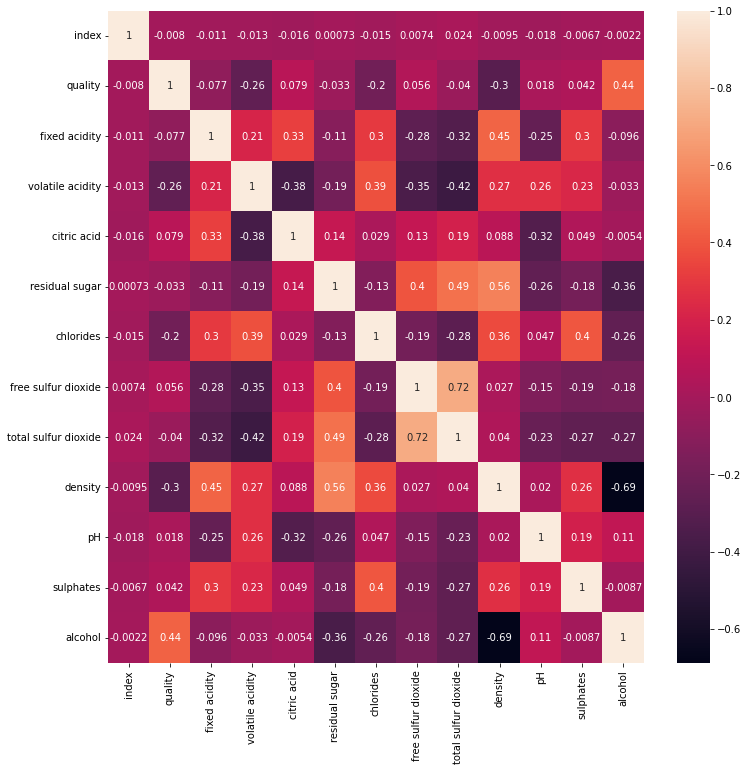

In [6]:
# trainÏùò Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º ÏÇ¥Ìé¥Î¥ÖÎãàÎã§. (ÏπºÎüºÏóê ÏûàÎäî Î≥ÄÏàòÎì§ Í∞Ñ)

# ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî Îëê Î≥ÄÏàò Í∞Ñ Í¥ÄÎ†®ÏÑ±ÏùÑ ÎÇòÌÉÄÎÇ¥Îäî Í≤ÉÏùº Îøê, Ïù∏Í≥ºÍ¥ÄÍ≥ÑÎ•º ÎÇòÌÉÄÎÇ¥Îäî Í≤ÉÏùÄ ÏïÑÎãò
# AÏôÄ BÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÎã§Îäî Ïù¥ÏïºÍ∏∞Îäî Ìï®Íªò ÏõÄÏßÅÏù¥Îäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§Îäî Í≤ÉÏù¥ÏßÄ, 
# AÎ•º Ï¶ùÍ∞ÄÌïòÍ≤å ÎßåÎì§Î©¥ BÍ∞Ä Ï¶ùÍ∞ÄÌï† Í≤ÉÏù¥Îã§ X!!!

# corr() -> Í∏∞Î≥∏Ï†ÅÏúºÎ°ú ÌîºÏñ¥Ïä® ÏÉÅÍ¥ÄÍ≥ÑÏàò (-1 ~ +1)
# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ.corr()
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True) #annot : Ïà´Ïûê Ï∂úÎ†•

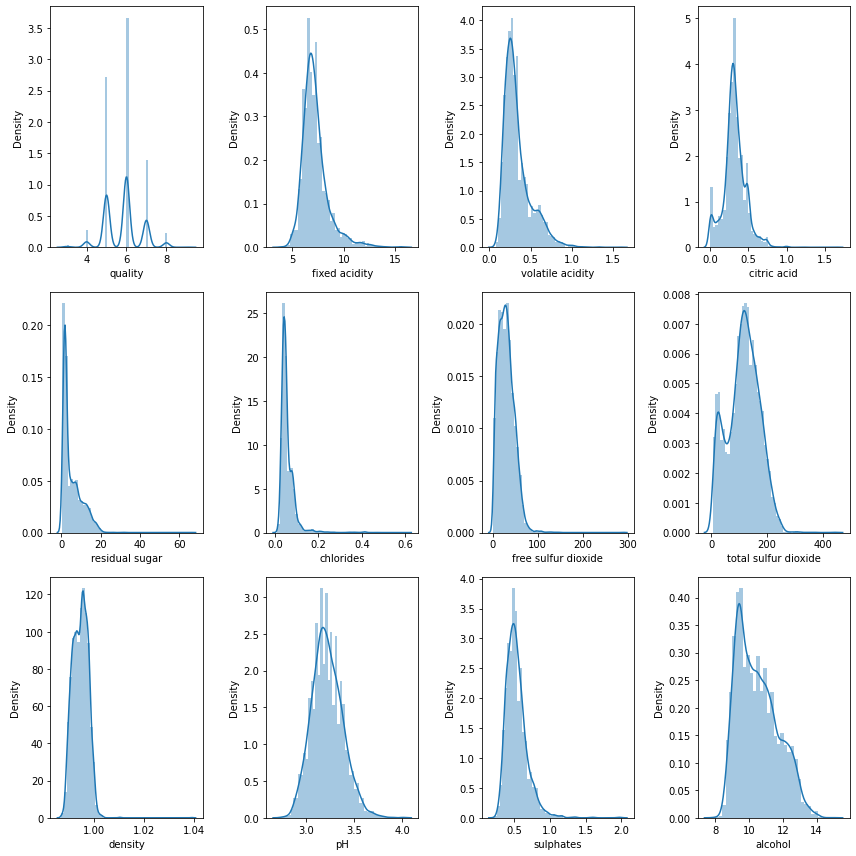

In [7]:
# trainÏùò Í∞Å Î≥ÄÏàòÎ≥Ñ Î∂ÑÌè¨Î•º ÏÇ¥Ìé¥Î¥ÖÎãàÎã§. 

#sns.distplot(tips['total_bill'], kde=False(ÏÑ† ÏóÜÏï†Í∏∞), bins=30(30Í∞úÎ°ú ÎÇòÎà† ÌëúÍ∏∞))

plt.figure(figsize=(12,12))
for i in range(1,13):#index Ï†úÏô∏ÌïòÍ≥†
    plt.subplot(3,4,i) #plt.subplot(Ìñâ, Ïó¥, Ïù∏Îç±Ïä§)
    sns.distplot(train.iloc[:,i]) #iloc[Ìñâ Î≤àÌò∏, Ïó¥(ÏπºÎüº)] <-> loc : labelÍ≥º index or Ï°∞Í±¥ÌëúÌòÑÏúºÎ°ú ÏÑ†ÌÉùÌïòÎäî Î∞©Î≤ï
plt.tight_layout() # Ïó¨Î∞±Ïóê Í¥ÄÎ†®Ìïú subplot ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ï†ï,ÏûÖÎ†• ÏóÜÏù¥ ÏÇ¨Ïö©ÌïòÎ©¥ ÏûêÎèô Ï°∞Ï†ï
plt.show()

#yÏ∂ï Density Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê ÏûàÎäî Í∑∏ Î∞ÄÎèÑÍ∞Ä ÏïÑÎãò..,  Í∞í ÏàòÎ•º ÏùòÎØ∏ÌïòÎäî ÎìØ

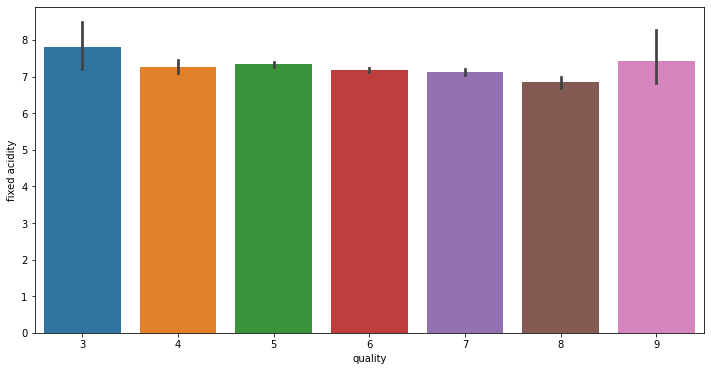

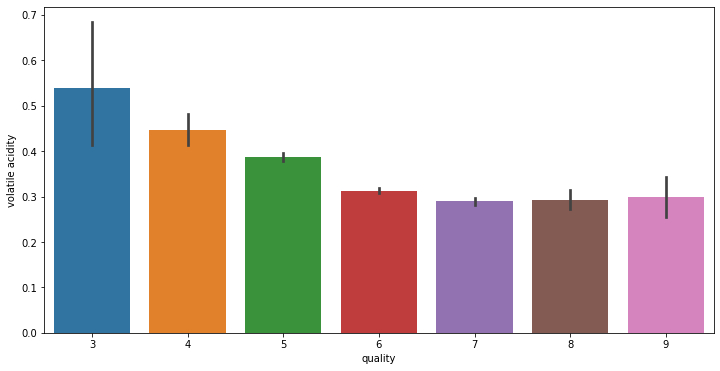

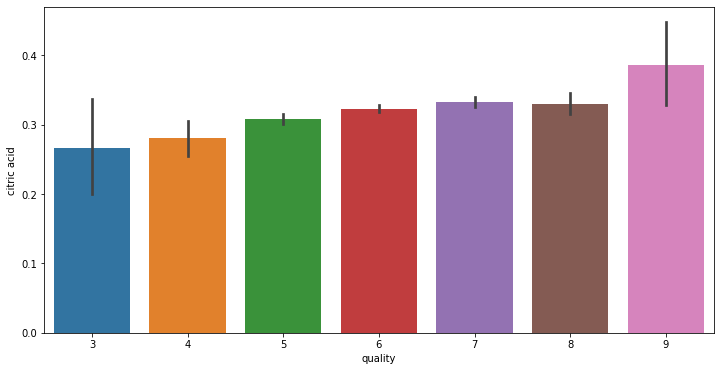

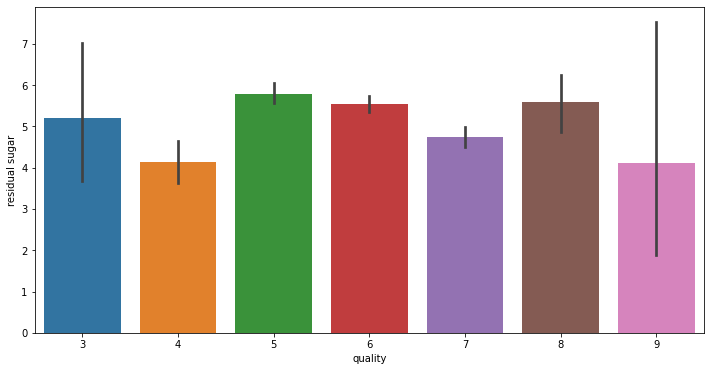

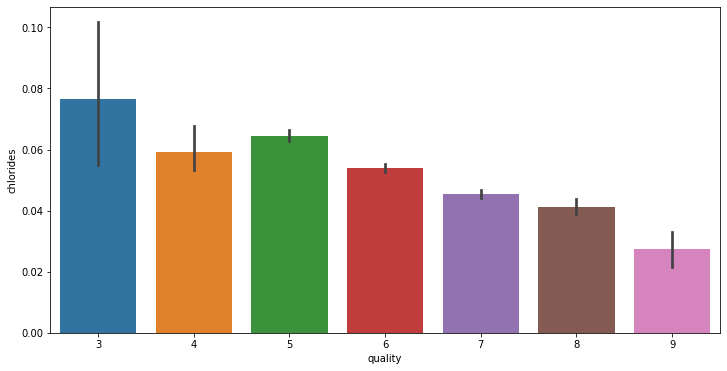

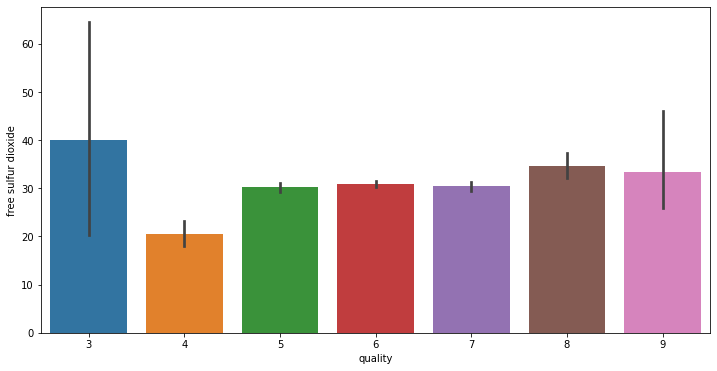

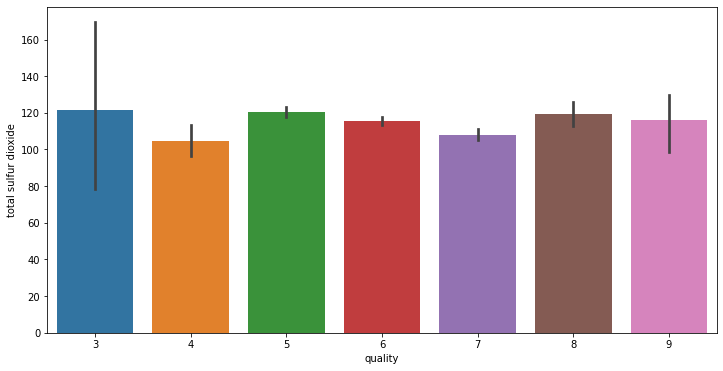

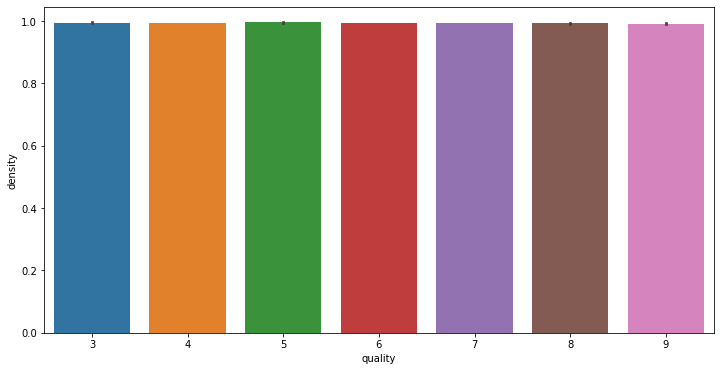

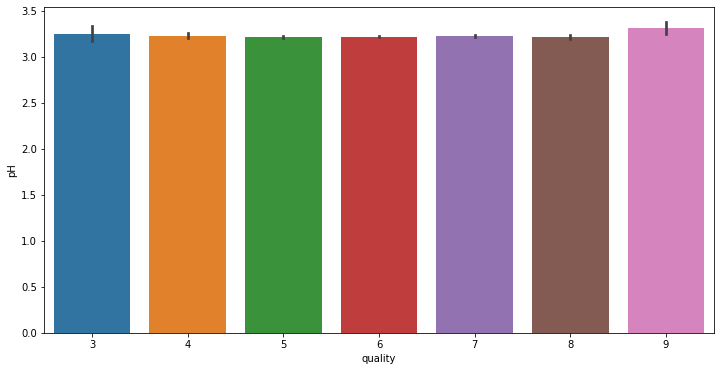

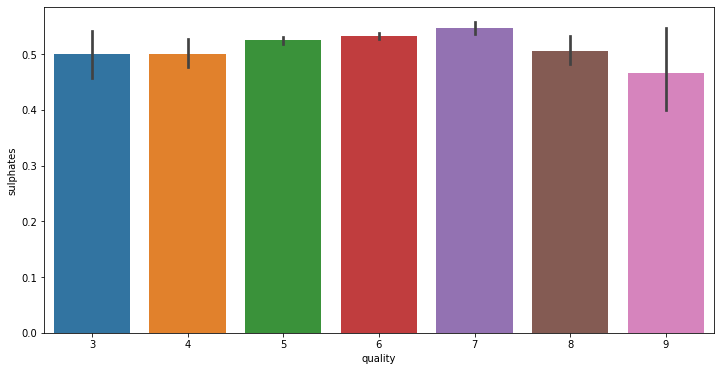

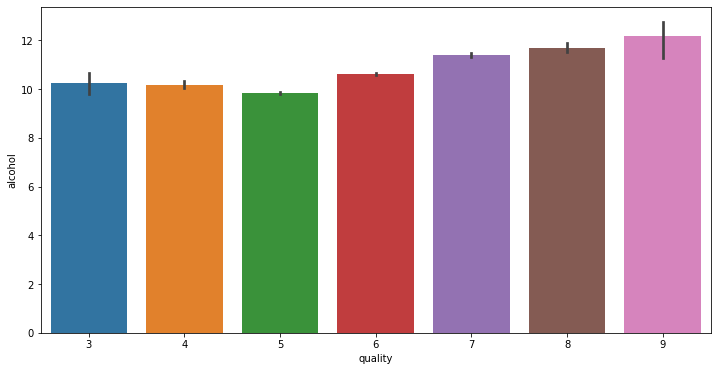

In [8]:
# trainÏóêÏÑú Í∞Å Î≥ÄÏàòÏôÄ quality Î≥ÄÏàò ÏÇ¨Ïù¥ Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
for i in range(11):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(x = 'quality', y = train.columns[i+2], data = train)

# 3. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

LabelEncoder : Ìä∏Î¶¨ Í≥ÑÏó¥Ïùò ML ÏïåÍ≥†Î¶¨Ï¶òÏóê ÏÇ¨Ïö© 

üö´ but ÏÑ†Ìòï ÌöåÍ∑ÄÏôÄ Í∞ôÏùÄ ML ÏïåÍ≥†Î¶¨Ï¶òÏóêÎäî Ï†ÅÏö© X (Îçî ÌÅ∞ Í∞íÏúºÎ°ú Í∞ÄÏ§ëÏπò Î∂ÄÏó¨Îê®)

In [9]:
# typeÏóêÎäî whiteÏôÄ red Îëê Ï¢ÖÎ•òÍ∞Ä ÏûàÏäµÎãàÎã§.
# Í∞ÅÍ∞Å 0,1Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
# Î¨∏Ïûê -> Ïà´Ïûê
from sklearn.preprocessing import LabelEncoder


enc = LabelEncoder() 
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])


In [10]:
print(train['type'])
print(enc.classes_)

0       1
1       0
2       1
3       1
4       1
       ..
5492    1
5493    1
5494    1
5495    1
5496    1
Name: type, Length: 5497, dtype: int64
['red' 'white']


In [11]:
train.head()

index  quality  fixed acidity  ...  sulphates  alcohol  type
0      0        5            5.6  ...       0.44     10.2     1
1      1        5            8.8  ...       0.59      9.5     0
2      2        5            7.9  ...       0.52     10.9     1
3      3        6            7.0  ...       0.50     10.8     1
4      4        6            7.8  ...       0.43     10.9     1

[5 rows x 14 columns]

In [12]:
train.tail()

index  quality  fixed acidity  ...  sulphates  alcohol  type
5492   5492        5            7.7  ...       0.39     10.1     1
5493   5493        6            6.3  ...       0.51     11.0     1
5494   5494        7            7.8  ...       0.72     11.3     1
5495   5495        5            6.6  ...       0.41     10.5     1
5496   5496        6            7.0  ...       0.36      9.7     1

[5 rows x 14 columns]

In [13]:
# Î∂àÌïÑÏöîÌïú Î≥ÄÏàò Ï†úÍ±∞
train_x = train.drop(['index', 'quality'], axis = 1) # axis = 0 (Ìñâ), axis = 1 (Ïó¥)
train_y = train['quality']
test_x = test.drop('index', axis = 1)

In [14]:
train_x.shape, train_y.shape, test_x.shape

((5497, 12), (5497,), (1000, 12))

# 4. Î™®Îç∏ÎßÅ


In [15]:
from sklearn.ensemble import RandomForestClassifier
# Î™®Îç∏ ÏÑ†Ïñ∏
 
model = RandomForestClassifier(random_state=0, n_jobs = -1) #n_jobs = -1 -> Î™®Îì† CPU ÏΩîÏñ¥ Ïù¥Ïö©Ìï¥ ÌïôÏäµ
# random_state=0 -> ÏàòÌñâÏãúÎßàÎã§ ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º ÏñªÍ∏∞ ÏúÑÌï¥ (seed Í∞íÏùÑ Í≥†Ï†ï, Ïñ¥Îñ§ Í∞íÏúºÎ°ú Ìï¥ÎèÑ ÏÉÅÍ¥Ä X)

#Î™®Îç∏ ÌïôÏäµ
model.fit(train_x, train_y)


RandomForestClassifier(n_jobs=-1, random_state=0)

## ‚úì GridSearchCV :

ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ Í∏∞Î∞òÏúºÎ°ú ÏµúÏ†Å ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù(Ïò§Îûò Í±∏Î¶º)


---



Î∂ÑÎ•ò or ÌöåÍ∑Ä ÏïåÍ≥†Î¶¨Ï¶òÏóê ÏÇ¨Ïö©ÎêòÎäî ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÏûÖÎ†•ÌïòÎ©¥ÏÑú Ìé∏Î¶¨ÌïòÍ≤å ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞ ÎèÑÏ∂ú

Îã§ÏùåÍ≥º Í∞ôÏùÄ ÌååÎùºÎØ∏ÌÑ∞ ÏßëÌï©ÏùÑ ÎßåÎì§Í≥† Ïù¥Î•º ÏàúÏ∞®Ï†ÅÏúºÎ°ú Ï†ÅÏö©ÌïòÎ©¥ÏÑú ÏµúÏ†ÅÌôî



`grid_dtree = GridSearchCV(dtree, param_grid=parameters(ÎîïÏÖîÎÑàÎ¶¨), cv=3, refit=True)`

- estimator : classifier, regressor, pipeine 

- cv : Î∂ÑÌï†Ìï† Ìè¥Îî© ÏÑ∏Ìä∏ Ïàò(ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏúÑÌï¥ Î∂ÑÌï†ÎêòÎäî ÌïôÏäµ/ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïùò Í∞úÏàò) ----> param_gridÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Îì§ÏùÑ 3Í∞úÏùò train, test set fold Î°ú ÎÇòÎàÑÏñ¥ÏÑú ÌÖåÏä§Ìä∏ ÏàòÌñâ ÏÑ§Ï†ï.  (ÌïôÏäµ/ÌèâÍ∞Ä Ïàò = cv*ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï© Ïàò)

- refit=True Í∞Ä default ÏûÑ. TrueÏù¥Î©¥ Í∞ÄÏû• Ï¢ãÏùÄ ÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÏùÄ Îí§, ÏµúÏ†ÅÏùò ÏÑ§Ï†ïÏúºÎ°ú Ïû¨ ÌïôÏäµ ÏãúÌÇ¥.  

In [29]:

#get_params().keys() -> Î™®Îç∏(ÎûúÎç§Ìè¨Î†àÏä§Ìä∏) ÌååÎùºÎØ∏ÌÑ∞ Î≥ÄÏàòÎì§ Î≥¥Ïó¨Ï§å
#Ïù¥Í±∞ Ìï¥ÏÑú ÎÇòÏò§Îäî Î≥ÄÏàòÎì§ÏùÑ ÌååÎùºÎØ∏ÌÑ∞Ïóê ÎÑ£Ïùå
model.get_params().keys()


dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [42]:

#GridSearchCVÎ°ú ÏµúÏ†ÅÏùò ÌååÎùºÎØ∏ÌÑ∞ Ï∞æÏïÑÎ≥¥Ïûê

%%time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    "max_depth" : [18,20,22,25,30],  
    "min_samples_leaf" : [2,3,4,6,8],
    "min_samples_split" : [33,35,40,45,50],         
    "n_estimators" : [22,25,30,35,38],    
}


grid_cv = GridSearchCV(model, param_grid = params, cv =10, n_jobs = -1)


CPU times: user 66 ¬µs, sys: 4 ¬µs, total: 70 ¬µs
Wall time: 76.1 ¬µs


In [43]:

%%time

grid_cv.fit(train_x,train_y)

print("ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ : ", grid_cv.best_params_) 
#cv : Î∂ÑÌï†Ìï† Ìè¥Îî© ÏÑ∏Ìä∏ Ïàò(ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÏúÑÌï¥ Î∂ÑÌï†ÎêòÎäî ÌïôÏäµ/ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïùò Í∞úÏàò) --> ÌïôÏäµ/ÌèâÍ∞Ä Ïàò = cv*ÌååÎùºÎØ∏ÌÑ∞ Ï°∞Ìï© Ïàò
print("ÏµúÍ≥† ÏòàÏ∏° Ï†ïÌôïÎèÑ : {0:.4f}" .format(grid_cv.best_score_))


scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df.columns
scores_df[['params', 'mean_test_score', 'rank_test_score']]


ÏµúÏ†ÅÏùò ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ :  {'max_depth': 22, 'min_samples_leaf': 2, 'min_samples_split': 33, 'n_estimators': 38}
ÏµúÍ≥† ÏòàÏ∏° Ï†ïÌôïÎèÑ : 0.6162
CPU times: user 44.5 s, sys: 2.82 s, total: 47.3 s
Wall time: 21min 47s


In [44]:
# ÌïôÏäµÎêú Î™®Îç∏Î°ú test Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
y_pred = model.predict(test_x)
y_pred

array([6, 6, 6, 5, 6, 6, 6, 6, 6, 7, 6, 6, 7, 6, 6, 5, 6, 6, 6, 5, 6, 6,
       5, 7, 6, 5, 5, 5, 6, 5, 7, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 5, 6, 6,
       6, 7, 5, 6, 4, 6, 5, 5, 6, 4, 5, 6, 6, 5, 5, 6, 5, 6, 6, 4, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 7, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 5,
       6, 6, 6, 5, 5, 6, 6, 7, 6, 6, 6, 5, 6, 7, 5, 5, 6, 6, 6, 7, 5, 5,
       4, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 7, 6, 6, 6, 5, 8, 6, 5,
       6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 5,
       6, 5, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 7, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 7,
       6, 5, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 5, 6, 6, 7, 6, 6,
       6, 6, 7, 6, 6, 7, 5, 6, 5, 6, 6, 7, 6, 6, 6, 7, 6, 6, 7, 5, 5, 7,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 6, 6, 6, 6, 5, 7, 7,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 8, 6, 5, 7, 7,

In [20]:
#accuracy = accuracy_score(y_test,y_pred)
#print("ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Ï†ïÌôïÎèÑ : {0:4.f} .format(accuracy)")
#y_test Í∞í Î™®Î•¥ÎãàÍπå pass

# 5. Ï†úÏ∂ú ÌååÏùº ÏÉùÏÑ±

In [25]:
submission = pd.read_csv('sample_submission.csv')

In [26]:
submission['quality'] = y_pred

In [27]:
submission

index  quality
0        0        6
1        1        6
2        2        6
3        3        5
4        4        6
..     ...      ...
995    995        6
996    996        6
997    997        5
998    998        6
999    999        6

[1000 rows x 2 columns]

In [28]:
# csv ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.
submission.to_csv('baseline.csv', index=False)